In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange

In [2]:
# need to change
ipts="27734"

In [3]:
ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
os.listdir(ct_loc)

['2022_12_07', '2022_09_30_bee', '2022_10_01_battery']

In [4]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
os.listdir(ob_loc)

['2022_09_30_high_res_gadox',
 '2022_12_15_screens',
 '2022_10_03_battery',
 '2022_10_18_epi_scintillators',
 '2022_12_07',
 '2022_09_30_bee',
 '2022_09_30_high_res_gadox_LiF']

In [5]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/df"
os.listdir(dc_loc)

['2022_10_14_high_res',
 '2022_10_12_low_res',
 '2022_10_13_low_res',
 '2022_09_30_power_cycle',
 '2022_09_30_0C',
 '2022_09_30']

In [6]:
###################### need to change start
sample_name = "2022_10_01_battery"
ct_dir = os.path.join(ct_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2022_10_03_battery")
dc_dir = os.path.join(dc_loc, "2022_10_14_high_res")
# ct_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# ob_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# dc_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
gamma_diff = 20
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon/" + sample_name
ob_name = save_to + "_ob/" + 'ob_0000'
dc_name = save_to + "_dc/" + 'dc_0000'
###################### need to change end

# Find ROI and crop

In [7]:
ct_file_list = os.listdir(ct_dir)
# ct_file_list.remove('20221108_dummy_0005_000_000_0044.tiff')
fname_df = rocku.get_fname_df(ct_file_list, golden_ratio=False)
fname_df

,fname,ang_deg,ang_rad,idx
0,20221002_battery_0030_069_030_3880.tiff,69.03,1.204801,3880
1,20221003_battery_0030_260_780_6809.tiff,260.78,4.551470,6809
2,20221003_battery_0030_266_090_6885.tiff,266.09,4.644147,6885
3,20221002_battery_0030_186_440_5676.tiff,186.44,3.253992,5676
4,20221001_battery_0030_018_880_3118.tiff,18.88,0.329518,3118
...,...,...,...,...
4099,20221002_battery_0030_157_530_5230.tiff,157.53,2.749417,5230
4100,20221002_battery_0030_184_670_5649.tiff,184.67,3.223100,5649
4101,20221001_battery_0030_030_680_3297.tiff,30.68,0.535467,3297
4102,20221002_battery_0030_064_310_3813.tiff,64.31,1.122421,3813


In [8]:
fname_df.sort_values('ang_deg', inplace=True)
ang_list = fname_df['ang_deg'].to_list()
ordered_list = fname_df['fname'].to_list()
fname_df

,fname,ang_deg,ang_rad,idx
1060,20221001_battery_0030_000_000_2830.tiff,0.00,0.000000,2830
3404,20221001_battery_0030_000_000_2827.tiff,0.00,0.000000,2827
3331,20221001_battery_0030_000_000_2824.tiff,0.00,0.000000,2824
1012,20221001_battery_0030_000_000_2829.tiff,0.00,0.000000,2829
353,20221001_battery_0030_000_000_2828.tiff,0.00,0.000000,2828
...,...,...,...,...
1869,20221003_battery_0030_268_450_6921.tiff,268.45,4.685336,6921
780,20221003_battery_0030_268_450_6924.tiff,268.45,4.685336,6924
440,20221003_battery_0030_268_450_6926.tiff,268.45,4.685336,6926
1519,20221003_battery_0030_268_450_6923.tiff,268.45,4.685336,6923


2it [00:00,  2.35it/s]


Projection at 0 degree:


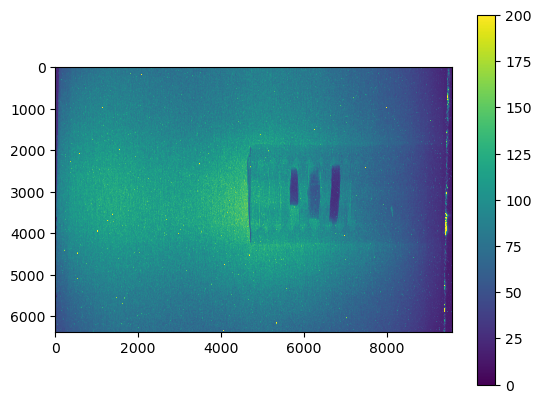

Projection at 180 degree:


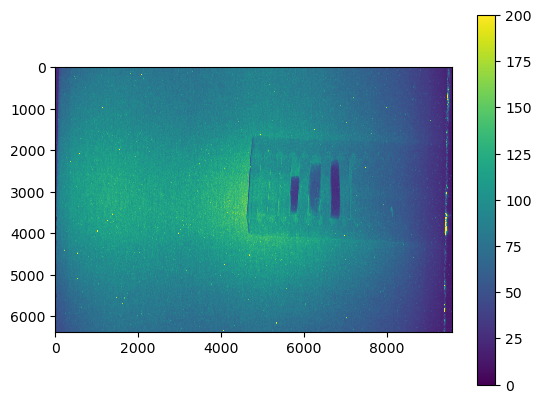

In [9]:
proj180_idx, proj180_ang = rocku.find_idx_by_ang(ang_list, 180)
proj000_idx, proj000_ang = rocku.find_idx_by_ang(ang_list, 0)
preview_image_stack = rocku.read_tiff_stack(ct_dir, [ordered_list[proj000_idx], ordered_list[proj180_idx]])
print("Projection at 0 degree:")
plt.imshow(preview_image_stack[0], vmin=0, vmax=200)
plt.colorbar()
plt.show()
print("Projection at 180 degree:")
plt.imshow(preview_image_stack[1], vmin=0, vmax=200)
plt.colorbar()
plt.show()

In [10]:
preview_image_stack.shape

(2, 6388, 9576)

Projection at 0 degree:


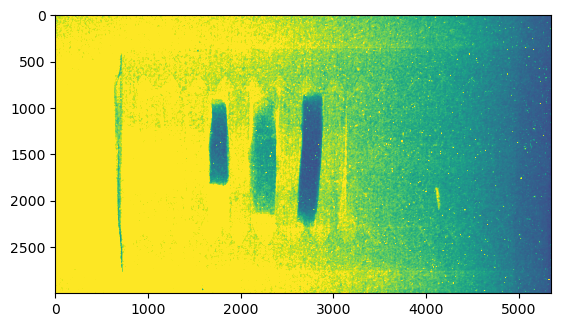

Projection at 180 degree:


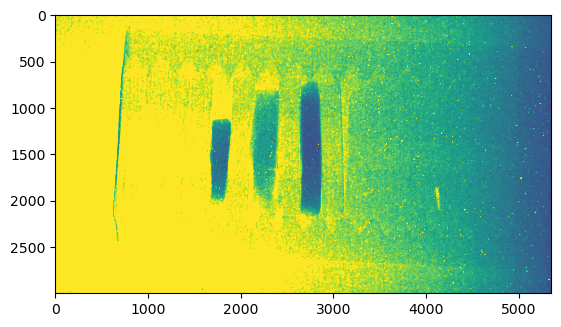

In [11]:
###################### need to change start
crop = True
crop_left = 4000
crop_right = 9350
crop_top = 1500
crop_bottom = 4500
###################### need to change end
preview_image_stack_crop = rocku.crop(preview_image_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
print("Projection at 0 degree:")
plt.imshow(preview_image_stack_crop[0], vmin=0, vmax=100)
plt.show()
print("Projection at 180 degree:")
plt.imshow(preview_image_stack_crop[1], vmin=0, vmax=100)
plt.show()

# Preprocess OB

Loading OB ...


27it [00:06,  4.04it/s]


(27, 6388, 9576)
Cropping ...
Removing outliers ...
Combining with median ...
(3000, 5350)
Rotating by 90 deg ...
(5350, 3000)


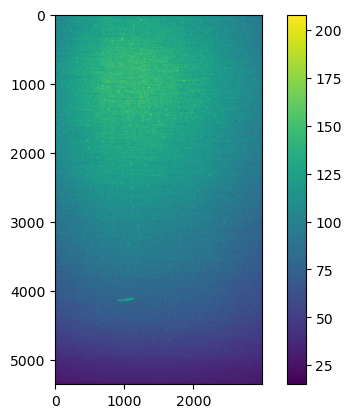

Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ob/ob_0000 ...


In [12]:
print('Loading OB ...')
ob_stack = rocku.read_tiff_stack(ob_dir, os.listdir(ob_dir))
print(ob_stack.shape)
print('Cropping ...')
ob_stack_crop = rocku.crop(ob_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
print('Removing outliers ...')
ob_stack_cleaned = tomopy.remove_outlier(ob_stack_crop, gamma_diff)
print('Combining with median ...')
if ob_stack_cleaned.shape[0] == 1:
    ob_med = ob_stack_cleaned[:]
else:
    ob_med = np.median(ob_stack_cleaned, axis=0).astype(np.ushort)
print(ob_med.shape)
print('Rotating by 90 deg ...')
ob_rot = np.rot90(ob_med, k=-1)
print(ob_rot.shape)
plt.imshow(ob_rot)
plt.colorbar()
plt.show()
print('Saving {} ...'.format(ob_name))
dxchange.write_tiff(ob_rot, fname=ob_name, overwrite=True)

# Preprocess DC

Loading DC ...


27it [00:06,  4.14it/s]


(27, 6388, 9576)
Cropping ...
Removing outliers ...
Combining with median ...
(3000, 5350)
Rotating by 90 deg ...
(5350, 3000)


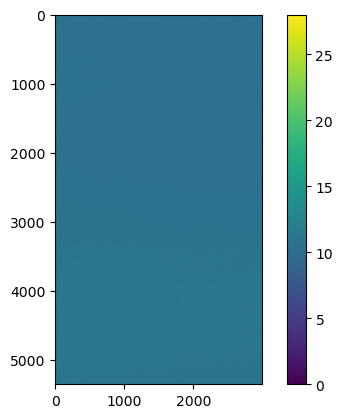

Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_dc/dc_0000 ...


In [13]:
print('Loading DC ...')
dc_stack = rocku.read_tiff_stack(dc_dir, os.listdir(dc_dir))
print(dc_stack.shape)
print('Cropping ...')
dc_stack_crop = rocku.crop(dc_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
print('Removing outliers ...')
dc_stack_cleaned = tomopy.remove_outlier(dc_stack_crop, gamma_diff)
print('Combining with median ...')
if dc_stack_cleaned.shape[0] == 1:
    dc_med = dc_stack_cleaned[:]
else:
    dc_med = np.median(dc_stack_cleaned, axis=0).astype(np.ushort)
print(dc_med.shape)
print('Rotating by 90 deg ...')
dc_rot = np.rot90(dc_med, k=-1)
print(dc_rot.shape)
plt.imshow(dc_rot)
plt.colorbar()
plt.show()
print('Saving {} ...'.format(dc_name))
dxchange.write_tiff(dc_rot, fname=dc_name, overwrite=True)

# Preprocess CT scan files

In [14]:
grouped_dict = {}
for i, e_ang in enumerate(set(ang_list)):
    _fname_list = list(fname_df[fname_df['ang_deg'] == e_ang]['fname'])
    grouped_dict[_fname_list[0]] = _fname_list
pprint.pprint(grouped_dict)

{'20221001_battery_0030_000_000_2830.tiff': ['20221001_battery_0030_000_000_2830.tiff',
                                             '20221001_battery_0030_000_000_2827.tiff',
                                             '20221001_battery_0030_000_000_2824.tiff',
                                             '20221001_battery_0030_000_000_2829.tiff',
                                             '20221001_battery_0030_000_000_2828.tiff',
                                             '20221001_battery_0030_000_000_2832.tiff',
                                             '20221001_battery_0030_000_000_2826.tiff',
                                             '20221001_battery_0030_000_000_2825.tiff',
                                             '20221001_battery_0030_000_000_2831.tiff'],
 '20221001_battery_0030_000_590_2833.tiff': ['20221001_battery_0030_000_590_2833.tiff',
                                             '20221001_battery_0030_000_590_2839.tiff',
                               

 '20221002_battery_0030_071_980_3926.tiff': ['20221002_battery_0030_071_980_3926.tiff',
                                             '20221002_battery_0030_071_980_3930.tiff',
                                             '20221002_battery_0030_071_980_3925.tiff',
                                             '20221002_battery_0030_071_980_3922.tiff',
                                             '20221002_battery_0030_071_980_3927.tiff',
                                             '20221002_battery_0030_071_980_3928.tiff',
                                             '20221002_battery_0030_071_980_3924.tiff',
                                             '20221002_battery_0030_071_980_3929.tiff',
                                             '20221002_battery_0030_071_980_3923.tiff'],
 '20221002_battery_0030_072_570_3933.tiff': ['20221002_battery_0030_072_570_3933.tiff',
                                             '20221002_battery_0030_072_570_3934.tiff',
                               

                                             '20221002_battery_0030_152_810_5158.tiff',
                                             '20221002_battery_0030_152_810_5156.tiff'],
 '20221002_battery_0030_153_400_5171.tiff': ['20221002_battery_0030_153_400_5171.tiff',
                                             '20221002_battery_0030_153_400_5166.tiff',
                                             '20221002_battery_0030_153_400_5164.tiff',
                                             '20221002_battery_0030_153_400_5167.tiff',
                                             '20221002_battery_0030_153_400_5172.tiff',
                                             '20221002_battery_0030_153_400_5165.tiff',
                                             '20221002_battery_0030_153_400_5170.tiff',
                                             '20221002_battery_0030_153_400_5169.tiff',
                                             '20221002_battery_0030_153_400_5168.tiff'],
 '20221002_battery_0030_153_99

                                             '20221003_battery_0030_234_820_6412.tiff',
                                             '20221003_battery_0030_234_820_6406.tiff'],
 '20221003_battery_0030_235_410_6420.tiff': ['20221003_battery_0030_235_410_6420.tiff',
                                             '20221003_battery_0030_235_410_6417.tiff',
                                             '20221003_battery_0030_235_410_6421.tiff',
                                             '20221003_battery_0030_235_410_6422.tiff',
                                             '20221003_battery_0030_235_410_6418.tiff',
                                             '20221003_battery_0030_235_410_6423.tiff',
                                             '20221003_battery_0030_235_410_6416.tiff',
                                             '20221003_battery_0030_235_410_6419.tiff',
                                             '20221003_battery_0030_235_410_6415.tiff'],
 '20221003_battery_0030_236_00

In [15]:
# for e_group in ['20221108_Image_180_000_0030_0063.tiff']:
for e_group in grouped_dict.keys():
    _fname_list = grouped_dict[e_group]
    print('##################################')
    print('Processing group start with {} ...'.format(e_group))
    print('Loading ...')
    _image_stack = rocku.read_tiff_stack(ct_dir, _fname_list)
    print('Cropping ...')
    _image_stack_crop = rocku.crop(_image_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
    print('Removing outliers ...')
    _image_stack_cleaned = tomopy.remove_outlier(_image_stack_crop, gamma_diff)
    print('Combining with median ...')
    _image_med = np.median(_image_stack_cleaned, axis=0).astype(np.ushort)
    print('Rotating by 90 deg ...')
    _image_rot = np.rot90(_image_med, k=-1)
    fname_raw = save_to + "_ct/" + e_group
    print('Saving {} ...'.format(fname_raw))
    dxchange.write_tiff(_image_rot, fname=fname_raw, overwrite=True)
    _image_norm, _ob, _dc = rocku.normalize(_image_rot, ob_rot, dc_rot)
    fname_norm = save_to + "_norm/" + e_group
    print('Saving {} ...'.format(fname_norm))
    dxchange.write_tiff(_image_norm, fname=fname_norm, overwrite=True)

##################################
Processing group start with 20221001_battery_0030_000_000_2830.tiff ...
Loading ...


9it [00:01,  5.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_000_000_2830.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_000_000_2830.tiff ...
##################################
Processing group start with 20221001_battery_0030_002_950_2873.tiff ...
Loading ...


9it [00:01,  5.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_002_950_2873.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_002_950_2873.tiff ...
##################################
Processing group start with 20221001_battery_0030_003_540_2884.tiff ...
Loading ...


9it [00:01,  5.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_003_540_2884.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_003_540_2884.tiff ...
##################################
Processing group start with 20221001_battery_0030_004_130_2888.tiff ...
Loading ...


9it [00:01,  5.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_004_130_2888.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_004_130_2888.tiff ...
##################################
Processing group start with 20221001_battery_0030_004_720_2899.tiff ...
Loading ...


9it [00:01,  5.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_004_720_2899.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_004_720_2899.tiff ...
##################################
Processing group start with 20221001_battery_0030_005_310_2905.tiff ...
Loading ...


9it [00:01,  5.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_005_310_2905.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_005_310_2905.tiff ...
##################################
Processing group start with 20221001_battery_0030_005_900_2916.tiff ...
Loading ...


9it [00:01,  5.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_005_900_2916.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_005_900_2916.tiff ...
##################################
Processing group start with 20221001_battery_0030_006_490_2926.tiff ...
Loading ...


9it [00:01,  5.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_006_490_2926.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_006_490_2926.tiff ...
##################################
Processing group start with 20221001_battery_0030_007_080_2938.tiff ...
Loading ...


9it [00:01,  5.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_007_080_2938.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_007_080_2938.tiff ...
##################################
Processing group start with 20221001_battery_0030_007_670_2942.tiff ...
Loading ...


9it [00:01,  5.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_007_670_2942.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_007_670_2942.tiff ...
##################################
Processing group start with 20221001_battery_0030_008_260_2950.tiff ...
Loading ...


9it [00:01,  5.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_008_260_2950.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_008_260_2950.tiff ...
##################################
Processing group start with 20221001_battery_0030_008_850_2959.tiff ...
Loading ...


9it [00:01,  5.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_008_850_2959.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_008_850_2959.tiff ...
##################################
Processing group start with 20221001_battery_0030_009_440_2969.tiff ...
Loading ...


9it [00:01,  4.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_009_440_2969.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_009_440_2969.tiff ...
##################################
Processing group start with 20221001_battery_0030_010_030_2981.tiff ...
Loading ...


9it [00:01,  5.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_010_030_2981.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_010_030_2981.tiff ...
##################################
Processing group start with 20221001_battery_0030_010_620_2989.tiff ...
Loading ...


9it [00:01,  5.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_010_620_2989.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_010_620_2989.tiff ...
##################################
Processing group start with 20221001_battery_0030_011_210_2998.tiff ...
Loading ...


9it [00:01,  5.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_011_210_2998.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_011_210_2998.tiff ...
##################################
Processing group start with 20221001_battery_0030_011_800_3010.tiff ...
Loading ...


9it [00:01,  5.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_011_800_3010.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_011_800_3010.tiff ...
##################################
Processing group start with 20221001_battery_0030_012_390_3017.tiff ...
Loading ...


9it [00:01,  5.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_012_390_3017.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_012_390_3017.tiff ...
##################################
Processing group start with 20221001_battery_0030_013_570_3036.tiff ...
Loading ...


9it [00:01,  5.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_013_570_3036.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_013_570_3036.tiff ...
##################################
Processing group start with 20221001_battery_0030_014_160_3042.tiff ...
Loading ...


9it [00:01,  5.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_014_160_3042.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_014_160_3042.tiff ...
##################################
Processing group start with 20221001_battery_0030_015_340_3059.tiff ...
Loading ...


9it [00:01,  5.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_015_340_3059.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_015_340_3059.tiff ...
##################################
Processing group start with 20221001_battery_0030_016_520_3084.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_016_520_3084.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_016_520_3084.tiff ...
##################################
Processing group start with 20221001_battery_0030_017_110_3091.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_017_110_3091.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_017_110_3091.tiff ...
##################################
Processing group start with 20221001_battery_0030_018_290_3109.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_018_290_3109.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_018_290_3109.tiff ...
##################################
Processing group start with 20221001_battery_0030_019_470_3126.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_019_470_3126.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_019_470_3126.tiff ...
##################################
Processing group start with 20221001_battery_0030_020_060_3130.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_020_060_3130.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_020_060_3130.tiff ...
##################################
Processing group start with 20221001_battery_0030_021_240_3154.tiff ...
Loading ...


9it [00:02,  3.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_021_240_3154.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_021_240_3154.tiff ...
##################################
Processing group start with 20221001_battery_0030_022_420_3173.tiff ...
Loading ...


9it [00:02,  3.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_022_420_3173.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_022_420_3173.tiff ...
##################################
Processing group start with 20221001_battery_0030_023_010_3182.tiff ...
Loading ...


9it [00:02,  3.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_023_010_3182.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_023_010_3182.tiff ...
##################################
Processing group start with 20221001_battery_0030_024_190_3199.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_024_190_3199.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_024_190_3199.tiff ...
##################################
Processing group start with 20221001_battery_0030_025_370_3213.tiff ...
Loading ...


9it [00:02,  3.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_025_370_3213.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_025_370_3213.tiff ...
##################################
Processing group start with 20221001_battery_0030_026_550_3234.tiff ...
Loading ...


9it [00:02,  3.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_026_550_3234.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_026_550_3234.tiff ...
##################################
Processing group start with 20221001_battery_0030_027_140_3241.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_027_140_3241.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_027_140_3241.tiff ...
##################################
Processing group start with 20221001_battery_0030_027_730_3255.tiff ...
Loading ...


9it [00:02,  3.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_027_730_3255.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_027_730_3255.tiff ...
##################################
Processing group start with 20221001_battery_0030_029_500_3282.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_029_500_3282.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_029_500_3282.tiff ...
##################################
Processing group start with 20221001_battery_0030_030_090_3291.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_030_090_3291.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_030_090_3291.tiff ...
##################################
Processing group start with 20221001_battery_0030_031_270_3309.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_031_270_3309.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_031_270_3309.tiff ...
##################################
Processing group start with 20221001_battery_0030_032_450_3320.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_032_450_3320.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_032_450_3320.tiff ...
##################################
Processing group start with 20221001_battery_0030_033_040_3334.tiff ...
Loading ...


9it [00:02,  3.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_033_040_3334.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_033_040_3334.tiff ...
##################################
Processing group start with 20221001_battery_0030_033_630_3342.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_033_630_3342.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_033_630_3342.tiff ...
##################################
Processing group start with 20221001_battery_0030_034_220_3350.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_034_220_3350.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_034_220_3350.tiff ...
##################################
Processing group start with 20221001_battery_0030_037_170_3399.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_037_170_3399.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_037_170_3399.tiff ...
##################################
Processing group start with 20221001_battery_0030_038_350_3414.tiff ...
Loading ...


9it [00:02,  3.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_038_350_3414.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_038_350_3414.tiff ...
##################################
Processing group start with 20221001_battery_0030_039_530_3435.tiff ...
Loading ...


9it [00:02,  3.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_039_530_3435.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_039_530_3435.tiff ...
##################################
Processing group start with 20221002_battery_0030_042_480_3475.tiff ...
Loading ...


9it [00:02,  3.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_042_480_3475.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_042_480_3475.tiff ...
##################################
Processing group start with 20221002_battery_0030_043_070_3483.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_043_070_3483.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_043_070_3483.tiff ...
##################################
Processing group start with 20221002_battery_0030_044_250_3499.tiff ...
Loading ...


9it [00:02,  3.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_044_250_3499.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_044_250_3499.tiff ...
##################################
Processing group start with 20221001_battery_0030_041_300_3457.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_041_300_3457.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_041_300_3457.tiff ...
##################################
Processing group start with 20221002_battery_0030_043_660_3496.tiff ...
Loading ...


9it [00:02,  4.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_043_660_3496.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_043_660_3496.tiff ...
##################################
Processing group start with 20221002_battery_0030_044_840_3508.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_044_840_3508.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_044_840_3508.tiff ...
##################################
Processing group start with 20221002_battery_0030_045_430_3524.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_045_430_3524.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_045_430_3524.tiff ...
##################################
Processing group start with 20221002_battery_0030_046_020_3529.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_046_020_3529.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_046_020_3529.tiff ...
##################################
Processing group start with 20221002_battery_0030_046_610_3535.tiff ...
Loading ...


9it [00:02,  3.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_046_610_3535.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_046_610_3535.tiff ...
##################################
Processing group start with 20221002_battery_0030_047_200_3547.tiff ...
Loading ...


9it [00:02,  3.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_047_200_3547.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_047_200_3547.tiff ...
##################################
Processing group start with 20221002_battery_0030_048_380_3568.tiff ...
Loading ...


9it [00:02,  3.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_048_380_3568.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_048_380_3568.tiff ...
##################################
Processing group start with 20221002_battery_0030_049_560_3587.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_049_560_3587.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_049_560_3587.tiff ...
##################################
Processing group start with 20221002_battery_0030_050_150_3590.tiff ...
Loading ...


9it [00:02,  3.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_050_150_3590.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_050_150_3590.tiff ...
##################################
Processing group start with 20221002_battery_0030_051_330_3608.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_051_330_3608.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_051_330_3608.tiff ...
##################################
Processing group start with 20221002_battery_0030_052_510_3631.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_052_510_3631.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_052_510_3631.tiff ...
##################################
Processing group start with 20221002_battery_0030_053_100_3636.tiff ...
Loading ...


9it [00:02,  4.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_053_100_3636.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_053_100_3636.tiff ...
##################################
Processing group start with 20221002_battery_0030_054_280_3660.tiff ...
Loading ...


9it [00:02,  3.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_054_280_3660.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_054_280_3660.tiff ...
##################################
Processing group start with 20221002_battery_0030_055_460_3671.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_055_460_3671.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_055_460_3671.tiff ...
##################################
Processing group start with 20221002_battery_0030_056_050_3679.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_056_050_3679.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_056_050_3679.tiff ...
##################################
Processing group start with 20221002_battery_0030_057_230_3699.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_057_230_3699.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_057_230_3699.tiff ...
##################################
Processing group start with 20221002_battery_0030_058_410_3718.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_058_410_3718.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_058_410_3718.tiff ...
##################################
Processing group start with 20221002_battery_0030_059_000_3731.tiff ...
Loading ...


9it [00:02,  3.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_059_000_3731.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_059_000_3731.tiff ...
##################################
Processing group start with 20221002_battery_0030_060_180_3750.tiff ...
Loading ...


9it [00:02,  4.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_060_180_3750.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_060_180_3750.tiff ...
##################################
Processing group start with 20221002_battery_0030_061_360_3762.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_061_360_3762.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_061_360_3762.tiff ...
##################################
Processing group start with 20221002_battery_0030_063_130_3792.tiff ...
Loading ...


9it [00:02,  4.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_063_130_3792.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_063_130_3792.tiff ...
##################################
Processing group start with 20221002_battery_0030_064_310_3811.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_064_310_3811.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_064_310_3811.tiff ...
##################################
Processing group start with 20221001_battery_0030_014_750_3050.tiff ...
Loading ...


9it [00:01,  7.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_014_750_3050.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_014_750_3050.tiff ...
##################################
Processing group start with 20221002_battery_0030_065_490_3823.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_065_490_3823.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_065_490_3823.tiff ...
##################################
Processing group start with 20221002_battery_0030_066_080_3840.tiff ...
Loading ...


9it [00:02,  3.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_066_080_3840.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_066_080_3840.tiff ...
##################################
Processing group start with 20221002_battery_0030_068_440_3876.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_068_440_3876.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_068_440_3876.tiff ...
##################################
Processing group start with 20221002_battery_0030_069_030_3885.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_069_030_3885.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_069_030_3885.tiff ...
##################################
Processing group start with 20221002_battery_0030_070_210_3895.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_070_210_3895.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_070_210_3895.tiff ...
##################################
Processing group start with 20221002_battery_0030_071_390_3919.tiff ...
Loading ...


9it [00:02,  3.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_071_390_3919.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_071_390_3919.tiff ...
##################################
Processing group start with 20221002_battery_0030_072_570_3933.tiff ...
Loading ...


9it [00:02,  3.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_072_570_3933.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_072_570_3933.tiff ...
##################################
Processing group start with 20221002_battery_0030_073_160_3946.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_073_160_3946.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_073_160_3946.tiff ...
##################################
Processing group start with 20221002_battery_0030_074_340_3959.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_074_340_3959.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_074_340_3959.tiff ...
##################################
Processing group start with 20221002_battery_0030_075_520_3978.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_075_520_3978.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_075_520_3978.tiff ...
##################################
Processing group start with 20221002_battery_0030_076_110_3990.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_076_110_3990.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_076_110_3990.tiff ...
##################################
Processing group start with 20221002_battery_0030_077_290_4009.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_077_290_4009.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_077_290_4009.tiff ...
##################################
Processing group start with 20221002_battery_0030_078_470_4025.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_078_470_4025.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_078_470_4025.tiff ...
##################################
Processing group start with 20221002_battery_0030_079_060_4036.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_079_060_4036.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_079_060_4036.tiff ...
##################################
Processing group start with 20221002_battery_0030_080_240_4053.tiff ...
Loading ...


9it [00:02,  3.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_080_240_4053.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_080_240_4053.tiff ...
##################################
Processing group start with 20221002_battery_0030_081_420_4066.tiff ...
Loading ...


9it [00:02,  3.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_081_420_4066.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_081_420_4066.tiff ...
##################################
Processing group start with 20221002_battery_0030_082_010_4076.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_082_010_4076.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_082_010_4076.tiff ...
##################################
Processing group start with 20221002_battery_0030_083_190_4097.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_083_190_4097.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_083_190_4097.tiff ...
##################################
Processing group start with 20221002_battery_0030_084_370_4119.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_084_370_4119.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_084_370_4119.tiff ...
##################################
Processing group start with 20221002_battery_0030_085_550_4130.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_085_550_4130.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_085_550_4130.tiff ...
##################################
Processing group start with 20221002_battery_0030_086_140_4139.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_086_140_4139.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_086_140_4139.tiff ...
##################################
Processing group start with 20221002_battery_0030_087_320_4156.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_087_320_4156.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_087_320_4156.tiff ...
##################################
Processing group start with 20221002_battery_0030_088_500_4177.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_088_500_4177.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_088_500_4177.tiff ...
##################################
Processing group start with 20221002_battery_0030_089_090_4187.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_089_090_4187.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_089_090_4187.tiff ...
##################################
Processing group start with 20221002_battery_0030_090_270_4205.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_090_270_4205.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_090_270_4205.tiff ...
##################################
Processing group start with 20221002_battery_0030_091_450_4224.tiff ...
Loading ...


9it [00:02,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_091_450_4224.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_091_450_4224.tiff ...
##################################
Processing group start with 20221002_battery_0030_093_220_4246.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_093_220_4246.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_093_220_4246.tiff ...
##################################
Processing group start with 20221002_battery_0030_094_400_4272.tiff ...
Loading ...


9it [00:02,  3.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_094_400_4272.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_094_400_4272.tiff ...
##################################
Processing group start with 20221002_battery_0030_095_580_4288.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_095_580_4288.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_095_580_4288.tiff ...
##################################
Processing group start with 20221002_battery_0030_096_170_4293.tiff ...
Loading ...


9it [00:02,  3.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_096_170_4293.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_096_170_4293.tiff ...
##################################
Processing group start with 20221002_battery_0030_098_530_4335.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_098_530_4335.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_098_530_4335.tiff ...
##################################
Processing group start with 20221002_battery_0030_099_120_4339.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_099_120_4339.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_099_120_4339.tiff ...
##################################
Processing group start with 20221002_battery_0030_100_300_4356.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_100_300_4356.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_100_300_4356.tiff ...
##################################
Processing group start with 20221002_battery_0030_101_480_4374.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_101_480_4374.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_101_480_4374.tiff ...
##################################
Processing group start with 20221002_battery_0030_102_070_4381.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_102_070_4381.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_102_070_4381.tiff ...
##################################
Processing group start with 20221002_battery_0030_103_250_4405.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_103_250_4405.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_103_250_4405.tiff ...
##################################
Processing group start with 20221002_battery_0030_104_430_4422.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_104_430_4422.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_104_430_4422.tiff ...
##################################
Processing group start with 20221002_battery_0030_105_020_4432.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_105_020_4432.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_105_020_4432.tiff ...
##################################
Processing group start with 20221002_battery_0030_106_200_4444.tiff ...
Loading ...


9it [00:02,  3.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_106_200_4444.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_106_200_4444.tiff ...
##################################
Processing group start with 20221002_battery_0030_108_560_4485.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_108_560_4485.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_108_560_4485.tiff ...
##################################
Processing group start with 20221002_battery_0030_109_150_4490.tiff ...
Loading ...


9it [00:02,  4.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_109_150_4490.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_109_150_4490.tiff ...
##################################
Processing group start with 20221002_battery_0030_110_330_4507.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_110_330_4507.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_110_330_4507.tiff ...
##################################
Processing group start with 20221002_battery_0030_111_510_4528.tiff ...
Loading ...


9it [00:02,  4.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_111_510_4528.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_111_510_4528.tiff ...
##################################
Processing group start with 20221002_battery_0030_113_280_4552.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_113_280_4552.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_113_280_4552.tiff ...
##################################
Processing group start with 20221002_battery_0030_114_460_4570.tiff ...
Loading ...


9it [00:02,  3.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_114_460_4570.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_114_460_4570.tiff ...
##################################
Processing group start with 20221002_battery_0030_115_050_4581.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_115_050_4581.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_115_050_4581.tiff ...
##################################
Processing group start with 20221002_battery_0030_116_230_4603.tiff ...
Loading ...


9it [00:02,  3.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_116_230_4603.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_116_230_4603.tiff ...
##################################
Processing group start with 20221002_battery_0030_118_000_4627.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_118_000_4627.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_118_000_4627.tiff ...
##################################
Processing group start with 20221002_battery_0030_119_180_4646.tiff ...
Loading ...


9it [00:02,  3.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_119_180_4646.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_119_180_4646.tiff ...
##################################
Processing group start with 20221001_battery_0030_024_780_3208.tiff ...
Loading ...


9it [00:02,  3.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_024_780_3208.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_024_780_3208.tiff ...
##################################
Processing group start with 20221002_battery_0030_120_360_4661.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_120_360_4661.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_120_360_4661.tiff ...
##################################
Processing group start with 20221002_battery_0030_121_540_4681.tiff ...
Loading ...


9it [00:02,  3.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_121_540_4681.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_121_540_4681.tiff ...
##################################
Processing group start with 20221002_battery_0030_122_130_4688.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_122_130_4688.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_122_130_4688.tiff ...
##################################
Processing group start with 20221002_battery_0030_123_310_4709.tiff ...
Loading ...


9it [00:02,  3.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_123_310_4709.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_123_310_4709.tiff ...
##################################
Processing group start with 20221002_battery_0030_125_080_4733.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_125_080_4733.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_125_080_4733.tiff ...
##################################
Processing group start with 20221002_battery_0030_126_260_4751.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_126_260_4751.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_126_260_4751.tiff ...
##################################
Processing group start with 20221002_battery_0030_127_440_4774.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_127_440_4774.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_127_440_4774.tiff ...
##################################
Processing group start with 20221002_battery_0030_128_030_4777.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_128_030_4777.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_128_030_4777.tiff ...
##################################
Processing group start with 20221002_battery_0030_128_620_4788.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_128_620_4788.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_128_620_4788.tiff ...
##################################
Processing group start with 20221002_battery_0030_129_210_4799.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_129_210_4799.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_129_210_4799.tiff ...
##################################
Processing group start with 20221002_battery_0030_129_800_4806.tiff ...
Loading ...


9it [00:03,  2.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_129_800_4806.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_129_800_4806.tiff ...
##################################
Processing group start with 20221002_battery_0030_133_340_4862.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_133_340_4862.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_133_340_4862.tiff ...
##################################
Processing group start with 20221002_battery_0030_130_390_4813.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_130_390_4813.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_130_390_4813.tiff ...
##################################
Processing group start with 20221002_battery_0030_130_980_4830.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_130_980_4830.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_130_980_4830.tiff ...
##################################
Processing group start with 20221002_battery_0030_136_290_4903.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_136_290_4903.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_136_290_4903.tiff ...
##################################
Processing group start with 20221002_battery_0030_137_470_4927.tiff ...
Loading ...


9it [00:03,  2.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_137_470_4927.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_137_470_4927.tiff ...
##################################
Processing group start with 20221002_battery_0030_138_060_4934.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_138_060_4934.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_138_060_4934.tiff ...
##################################
Processing group start with 20221002_battery_0030_131_570_4833.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_131_570_4833.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_131_570_4833.tiff ...
##################################
Processing group start with 20221002_battery_0030_140_420_4974.tiff ...
Loading ...


9it [00:02,  3.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_140_420_4974.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_140_420_4974.tiff ...
##################################
Processing group start with 20221002_battery_0030_141_010_4977.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_141_010_4977.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_141_010_4977.tiff ...
##################################
Processing group start with 20221002_battery_0030_133_930_4871.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_133_930_4871.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_133_930_4871.tiff ...
##################################
Processing group start with 20221002_battery_0030_143_370_5016.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_143_370_5016.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_143_370_5016.tiff ...
##################################
Processing group start with 20221002_battery_0030_135_110_4887.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_135_110_4887.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_135_110_4887.tiff ...
##################################
Processing group start with 20221002_battery_0030_136_880_4915.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_136_880_4915.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_136_880_4915.tiff ...
##################################
Processing group start with 20221002_battery_0030_138_650_4940.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_138_650_4940.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_138_650_4940.tiff ...
##################################
Processing group start with 20221002_battery_0030_139_240_4951.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_139_240_4951.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_139_240_4951.tiff ...
##################################
Processing group start with 20221002_battery_0030_148_090_5087.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_148_090_5087.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_148_090_5087.tiff ...
##################################
Processing group start with 20221002_battery_0030_141_600_4989.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_141_600_4989.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_141_600_4989.tiff ...
##################################
Processing group start with 20221002_battery_0030_150_450_5121.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_150_450_5121.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_150_450_5121.tiff ...
##################################
Processing group start with 20221002_battery_0030_151_040_5129.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_151_040_5129.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_151_040_5129.tiff ...
##################################
Processing group start with 20221002_battery_0030_152_220_5149.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_152_220_5149.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_152_220_5149.tiff ...
##################################
Processing group start with 20221002_battery_0030_153_400_5171.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_153_400_5171.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_153_400_5171.tiff ...
##################################
Processing group start with 20221002_battery_0030_145_140_5045.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_145_140_5045.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_145_140_5045.tiff ...
##################################
Processing group start with 20221002_battery_0030_146_320_5060.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_146_320_5060.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_146_320_5060.tiff ...
##################################
Processing group start with 20221002_battery_0030_156_350_5209.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_156_350_5209.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_156_350_5209.tiff ...
##################################
Processing group start with 20221002_battery_0030_157_530_5234.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_157_530_5234.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_157_530_5234.tiff ...
##################################
Processing group start with 20221002_battery_0030_158_120_5237.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_158_120_5237.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_158_120_5237.tiff ...
##################################
Processing group start with 20221002_battery_0030_151_630_5137.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_151_630_5137.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_151_630_5137.tiff ...
##################################
Processing group start with 20221002_battery_0030_152_810_5157.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_152_810_5157.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_152_810_5157.tiff ...
##################################
Processing group start with 20221002_battery_0030_161_070_5288.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_161_070_5288.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_161_070_5288.tiff ...
##################################
Processing group start with 20221002_battery_0030_162_250_5303.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_162_250_5303.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_162_250_5303.tiff ...
##################################
Processing group start with 20221002_battery_0030_154_580_5182.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_154_580_5182.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_154_580_5182.tiff ...
##################################
Processing group start with 20221002_battery_0030_155_170_5196.tiff ...
Loading ...


9it [00:02,  3.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_155_170_5196.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_155_170_5196.tiff ...
##################################
Processing group start with 20221002_battery_0030_165_200_5346.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_165_200_5346.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_165_200_5346.tiff ...
##################################
Processing group start with 20221002_battery_0030_166_380_5364.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_166_380_5364.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_166_380_5364.tiff ...
##################################
Processing group start with 20221002_battery_0030_167_560_5380.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_167_560_5380.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_167_560_5380.tiff ...
##################################
Processing group start with 20221002_battery_0030_159_300_5258.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_159_300_5258.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_159_300_5258.tiff ...
##################################
Processing group start with 20221002_battery_0030_160_480_5276.tiff ...
Loading ...


9it [00:02,  3.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_160_480_5276.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_160_480_5276.tiff ...
##################################
Processing group start with 20221002_battery_0030_170_510_5432.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_170_510_5432.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_170_510_5432.tiff ...
##################################
Processing group start with 20221002_battery_0030_171_100_5437.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_171_100_5437.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_171_100_5437.tiff ...
##################################
Processing group start with 20221001_battery_0030_034_810_3363.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_034_810_3363.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_034_810_3363.tiff ...
##################################
Processing group start with 20221002_battery_0030_172_280_5459.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_172_280_5459.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_172_280_5459.tiff ...
##################################
Processing group start with 20221002_battery_0030_165_790_5354.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_165_790_5354.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_165_790_5354.tiff ...
##################################
Processing group start with 20221002_battery_0030_175_230_5505.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_175_230_5505.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_175_230_5505.tiff ...
##################################
Processing group start with 20221002_battery_0030_176_410_5521.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_176_410_5521.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_176_410_5521.tiff ...
##################################
Processing group start with 20221002_battery_0030_177_000_5525.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_177_000_5525.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_177_000_5525.tiff ...
##################################
Processing group start with 20221002_battery_0030_169_330_5408.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_169_330_5408.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_169_330_5408.tiff ...
##################################
Processing group start with 20221002_battery_0030_171_690_5448.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_171_690_5448.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_171_690_5448.tiff ...
##################################
Processing group start with 20221002_battery_0030_172_870_5466.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_172_870_5466.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_172_870_5466.tiff ...
##################################
Processing group start with 20221002_battery_0030_173_460_5475.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_173_460_5475.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_173_460_5475.tiff ...
##################################
Processing group start with 20221002_battery_0030_174_050_5487.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_174_050_5487.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_174_050_5487.tiff ...
##################################
Processing group start with 20221002_battery_0030_174_640_5494.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_174_640_5494.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_174_640_5494.tiff ...
##################################
Processing group start with 20221002_battery_0030_175_820_5513.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_175_820_5513.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_175_820_5513.tiff ...
##################################
Processing group start with 20221002_battery_0030_177_590_5535.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_177_590_5535.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_177_590_5535.tiff ...
##################################
Processing group start with 20221002_battery_0030_178_180_5548.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_178_180_5548.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_178_180_5548.tiff ...
##################################
Processing group start with 20221002_battery_0030_178_770_5557.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_178_770_5557.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_178_770_5557.tiff ...
##################################
Processing group start with 20221002_battery_0030_179_360_5568.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_179_360_5568.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_179_360_5568.tiff ...
##################################
Processing group start with 20221002_battery_0030_180_540_5582.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_180_540_5582.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_180_540_5582.tiff ...
##################################
Processing group start with 20221002_battery_0030_181_130_5595.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_181_130_5595.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_181_130_5595.tiff ...
##################################
Processing group start with 20221002_battery_0030_182_310_5607.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_182_310_5607.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_182_310_5607.tiff ...
##################################
Processing group start with 20221001_battery_0030_038_940_3423.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_038_940_3423.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_038_940_3423.tiff ...
##################################
Processing group start with 20221002_battery_0030_184_080_5640.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_184_080_5640.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_184_080_5640.tiff ...
##################################
Processing group start with 20221002_battery_0030_185_260_5658.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_185_260_5658.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_185_260_5658.tiff ...
##################################
Processing group start with 20221002_battery_0030_186_440_5671.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_186_440_5671.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_186_440_5671.tiff ...
##################################
Processing group start with 20221002_battery_0030_187_030_5683.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_187_030_5683.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_187_030_5683.tiff ...
##################################
Processing group start with 20221002_battery_0030_188_210_5697.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_188_210_5697.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_188_210_5697.tiff ...
##################################
Processing group start with 20221002_battery_0030_189_390_5719.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_189_390_5719.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_189_390_5719.tiff ...
##################################
Processing group start with 20221002_battery_0030_190_570_5732.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_190_570_5732.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_190_570_5732.tiff ...
##################################
Processing group start with 20221002_battery_0030_191_160_5742.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_191_160_5742.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_191_160_5742.tiff ...
##################################
Processing group start with 20221002_battery_0030_192_340_5766.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_192_340_5766.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_192_340_5766.tiff ...
##################################
Processing group start with 20221002_battery_0030_193_520_5778.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_193_520_5778.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_193_520_5778.tiff ...
##################################
Processing group start with 20221002_battery_0030_194_110_5790.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_194_110_5790.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_194_110_5790.tiff ...
##################################
Processing group start with 20221002_battery_0030_195_290_5803.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_195_290_5803.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_195_290_5803.tiff ...
##################################
Processing group start with 20221002_battery_0030_196_470_5829.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_196_470_5829.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_196_470_5829.tiff ...
##################################
Processing group start with 20221002_battery_0030_197_060_5836.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_197_060_5836.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_197_060_5836.tiff ...
##################################
Processing group start with 20221002_battery_0030_198_240_5855.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_198_240_5855.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_198_240_5855.tiff ...
##################################
Processing group start with 20221002_battery_0030_199_420_5868.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_199_420_5868.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_199_420_5868.tiff ...
##################################
Processing group start with 20221002_battery_0030_200_010_5879.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_200_010_5879.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_200_010_5879.tiff ...
##################################
Processing group start with 20221002_battery_0030_201_190_5900.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_201_190_5900.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_201_190_5900.tiff ...
##################################
Processing group start with 20221002_battery_0030_202_370_5918.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_202_370_5918.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_202_370_5918.tiff ...
##################################
Processing group start with 20221002_battery_0030_203_550_5929.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_203_550_5929.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_203_550_5929.tiff ...
##################################
Processing group start with 20221002_battery_0030_204_140_5943.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_204_140_5943.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_204_140_5943.tiff ...
##################################
Processing group start with 20221002_battery_0030_205_320_5957.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_205_320_5957.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_205_320_5957.tiff ...
##################################
Processing group start with 20221002_battery_0030_206_500_5978.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_206_500_5978.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_206_500_5978.tiff ...
##################################
Processing group start with 20221002_battery_0030_207_090_5990.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_207_090_5990.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_207_090_5990.tiff ...
##################################
Processing group start with 20221002_battery_0030_208_270_6007.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_208_270_6007.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_208_270_6007.tiff ...
##################################
Processing group start with 20221002_battery_0030_209_450_6019.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_209_450_6019.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_209_450_6019.tiff ...
##################################
Processing group start with 20221002_battery_0030_210_040_6028.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_210_040_6028.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_210_040_6028.tiff ...
##################################
Processing group start with 20221002_battery_0030_211_220_6051.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_211_220_6051.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_211_220_6051.tiff ...
##################################
Processing group start with 20221002_battery_0030_212_400_6066.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_212_400_6066.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_212_400_6066.tiff ...
##################################
Processing group start with 20221002_battery_0030_213_580_6086.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_213_580_6086.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_213_580_6086.tiff ...
##################################
Processing group start with 20221002_battery_0030_214_170_6099.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_214_170_6099.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_214_170_6099.tiff ...
##################################
Processing group start with 20221003_battery_0030_215_350_6116.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_215_350_6116.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_215_350_6116.tiff ...
##################################
Processing group start with 20221003_battery_0030_216_530_6128.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_216_530_6128.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_216_530_6128.tiff ...
##################################
Processing group start with 20221003_battery_0030_217_120_6144.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_217_120_6144.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_217_120_6144.tiff ...
##################################
Processing group start with 20221003_battery_0030_218_300_6161.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_218_300_6161.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_218_300_6161.tiff ...
##################################
Processing group start with 20221003_battery_0030_219_480_6173.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_219_480_6173.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_219_480_6173.tiff ...
##################################
Processing group start with 20221003_battery_0030_220_070_6186.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_220_070_6186.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_220_070_6186.tiff ...
##################################
Processing group start with 20221003_battery_0030_221_250_6202.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_221_250_6202.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_221_250_6202.tiff ...
##################################
Processing group start with 20221003_battery_0030_222_430_6224.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_222_430_6224.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_222_430_6224.tiff ...
##################################
Processing group start with 20221003_battery_0030_223_020_6228.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_223_020_6228.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_223_020_6228.tiff ...
##################################
Processing group start with 20221003_battery_0030_224_200_6252.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_224_200_6252.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_224_200_6252.tiff ...
##################################
Processing group start with 20221003_battery_0030_225_380_6268.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_225_380_6268.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_225_380_6268.tiff ...
##################################
Processing group start with 20221003_battery_0030_226_560_6288.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_226_560_6288.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_226_560_6288.tiff ...
##################################
Processing group start with 20221003_battery_0030_227_150_6296.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_227_150_6296.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_227_150_6296.tiff ...
##################################
Processing group start with 20221003_battery_0030_228_330_6309.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_228_330_6309.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_228_330_6309.tiff ...
##################################
Processing group start with 20221003_battery_0030_229_510_6327.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_229_510_6327.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_229_510_6327.tiff ...
##################################
Processing group start with 20221003_battery_0030_230_100_6336.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_230_100_6336.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_230_100_6336.tiff ...
##################################
Processing group start with 20221003_battery_0030_231_280_6353.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_231_280_6353.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_231_280_6353.tiff ...
##################################
Processing group start with 20221003_battery_0030_232_460_6373.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_232_460_6373.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_232_460_6373.tiff ...
##################################
Processing group start with 20221002_battery_0030_048_970_3574.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_048_970_3574.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_048_970_3574.tiff ...
##################################
Processing group start with 20221003_battery_0030_234_230_6404.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_234_230_6404.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_234_230_6404.tiff ...
##################################
Processing group start with 20221003_battery_0030_235_410_6420.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_235_410_6420.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_235_410_6420.tiff ...
##################################
Processing group start with 20221003_battery_0030_236_000_6427.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_236_000_6427.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_236_000_6427.tiff ...
##################################
Processing group start with 20221003_battery_0030_237_180_6446.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_237_180_6446.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_237_180_6446.tiff ...
##################################
Processing group start with 20221003_battery_0030_238_360_6466.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_238_360_6466.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_238_360_6466.tiff ...
##################################
Processing group start with 20221003_battery_0030_239_540_6478.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_239_540_6478.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_239_540_6478.tiff ...
##################################
Processing group start with 20221003_battery_0030_240_130_6489.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_240_130_6489.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_240_130_6489.tiff ...
##################################
Processing group start with 20221003_battery_0030_241_310_6513.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_241_310_6513.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_241_310_6513.tiff ...
##################################
Processing group start with 20221003_battery_0030_242_490_6525.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_242_490_6525.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_242_490_6525.tiff ...
##################################
Processing group start with 20221003_battery_0030_243_080_6536.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_243_080_6536.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_243_080_6536.tiff ...
##################################
Processing group start with 20221003_battery_0030_244_260_6552.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_244_260_6552.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_244_260_6552.tiff ...
##################################
Processing group start with 20221003_battery_0030_245_440_6575.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_245_440_6575.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_245_440_6575.tiff ...
##################################
Processing group start with 20221003_battery_0030_246_030_6579.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_246_030_6579.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_246_030_6579.tiff ...
##################################
Processing group start with 20221001_battery_0030_000_590_2833.tiff ...
Loading ...


9it [00:01,  5.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_000_590_2833.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_000_590_2833.tiff ...
##################################
Processing group start with 20221003_battery_0030_248_390_6620.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_248_390_6620.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_248_390_6620.tiff ...
##################################
Processing group start with 20221003_battery_0030_249_570_6633.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_249_570_6633.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_249_570_6633.tiff ...
##################################
Processing group start with 20221003_battery_0030_250_160_6642.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_250_160_6642.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_250_160_6642.tiff ...
##################################
Processing group start with 20221003_battery_0030_251_340_6662.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_251_340_6662.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_251_340_6662.tiff ...
##################################
Processing group start with 20221003_battery_0030_252_520_6676.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_252_520_6676.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_252_520_6676.tiff ...
##################################
Processing group start with 20221003_battery_0030_253_110_6693.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_253_110_6693.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_253_110_6693.tiff ...
##################################
Processing group start with 20221003_battery_0030_254_290_6707.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_254_290_6707.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_254_290_6707.tiff ...
##################################
Processing group start with 20221003_battery_0030_255_470_6729.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_255_470_6729.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_255_470_6729.tiff ...
##################################
Processing group start with 20221003_battery_0030_256_060_6733.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_256_060_6733.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_256_060_6733.tiff ...
##################################
Processing group start with 20221003_battery_0030_257_240_6750.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_257_240_6750.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_257_240_6750.tiff ...
##################################
Processing group start with 20221002_battery_0030_053_690_3645.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_053_690_3645.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_053_690_3645.tiff ...
##################################
Processing group start with 20221003_battery_0030_259_010_6779.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_259_010_6779.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_259_010_6779.tiff ...
##################################
Processing group start with 20221003_battery_0030_260_190_6795.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_260_190_6795.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_260_190_6795.tiff ...
##################################
Processing group start with 20221003_battery_0030_261_370_6819.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_261_370_6819.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_261_370_6819.tiff ...
##################################
Processing group start with 20221003_battery_0030_262_550_6830.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_262_550_6830.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_262_550_6830.tiff ...
##################################
Processing group start with 20221003_battery_0030_263_140_6841.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_263_140_6841.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_263_140_6841.tiff ...
##################################
Processing group start with 20221003_battery_0030_264_320_6860.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_264_320_6860.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_264_320_6860.tiff ...
##################################
Processing group start with 20221003_battery_0030_265_500_6879.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_265_500_6879.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_265_500_6879.tiff ...
##################################
Processing group start with 20221003_battery_0030_266_090_6888.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_266_090_6888.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_266_090_6888.tiff ...
##################################
Processing group start with 20221003_battery_0030_267_270_6903.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_267_270_6903.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_267_270_6903.tiff ...
##################################
Processing group start with 20221003_battery_0030_268_450_6920.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_268_450_6920.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_268_450_6920.tiff ...
##################################
Processing group start with 20221002_battery_0030_059_590_3737.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_059_590_3737.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_059_590_3737.tiff ...
##################################
Processing group start with 20221002_battery_0030_063_720_3802.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_063_720_3802.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_063_720_3802.tiff ...
##################################
Processing group start with 20221002_battery_0030_064_900_3817.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_064_900_3817.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_064_900_3817.tiff ...
##################################
Processing group start with 20221002_battery_0030_067_850_3861.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_067_850_3861.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_067_850_3861.tiff ...
##################################
Processing group start with 20221001_battery_0030_018_880_3114.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_018_880_3114.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_018_880_3114.tiff ...
##################################
Processing group start with 20221002_battery_0030_069_620_3893.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_069_620_3893.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_069_620_3893.tiff ...
##################################
Processing group start with 20221002_battery_0030_073_750_3953.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_073_750_3953.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_073_750_3953.tiff ...
##################################
Processing group start with 20221002_battery_0030_074_930_3972.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_074_930_3972.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_074_930_3972.tiff ...
##################################
Processing group start with 20221002_battery_0030_077_880_4016.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_077_880_4016.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_077_880_4016.tiff ...
##################################
Processing group start with 20221001_battery_0030_028_910_3273.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_028_910_3273.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_028_910_3273.tiff ...
##################################
Processing group start with 20221002_battery_0030_079_650_4042.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_079_650_4042.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_079_650_4042.tiff ...
##################################
Processing group start with 20221002_battery_0030_082_600_4086.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_082_600_4086.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_082_600_4086.tiff ...
##################################
Processing group start with 20221002_battery_0030_083_780_4107.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_083_780_4107.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_083_780_4107.tiff ...
##################################
Processing group start with 20221002_battery_0030_087_910_4167.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_087_910_4167.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_087_910_4167.tiff ...
##################################
Processing group start with 20221002_battery_0030_089_680_4199.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_089_680_4199.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_089_680_4199.tiff ...
##################################
Processing group start with 20221002_battery_0030_092_630_4241.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_092_630_4241.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_092_630_4241.tiff ...
##################################
Processing group start with 20221002_battery_0030_093_810_4260.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_093_810_4260.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_093_810_4260.tiff ...
##################################
Processing group start with 20221002_battery_0030_097_350_4317.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_097_350_4317.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_097_350_4317.tiff ...
##################################
Processing group start with 20221002_battery_0030_097_940_4318.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_097_940_4318.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_097_940_4318.tiff ...
##################################
Processing group start with 20221001_battery_0030_001_180_2843.tiff ...
Loading ...


9it [00:02,  3.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_001_180_2843.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_001_180_2843.tiff ...
##################################
Processing group start with 20221002_battery_0030_102_660_4396.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_102_660_4396.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_102_660_4396.tiff ...
##################################
Processing group start with 20221002_battery_0030_103_840_4415.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_103_840_4415.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_103_840_4415.tiff ...
##################################
Processing group start with 20221002_battery_0030_107_970_4477.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_107_970_4477.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_107_970_4477.tiff ...
##################################
Processing group start with 20221002_battery_0030_107_380_4468.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_107_380_4468.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_107_380_4468.tiff ...
##################################
Processing group start with 20221002_battery_0030_112_690_4546.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_112_690_4546.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_112_690_4546.tiff ...
##################################
Processing group start with 20221002_battery_0030_112_100_4541.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_112_100_4541.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_112_100_4541.tiff ...
##################################
Processing group start with 20221002_battery_0030_113_870_4569.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_113_870_4569.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_113_870_4569.tiff ...
##################################
Processing group start with 20221002_battery_0030_116_820_4609.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_116_820_4609.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_116_820_4609.tiff ...
##################################
Processing group start with 20221002_battery_0030_117_410_4622.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_117_410_4622.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_117_410_4622.tiff ...
##################################
Processing group start with 20221002_battery_0030_118_590_4633.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_118_590_4633.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_118_590_4633.tiff ...
##################################
Processing group start with 20221002_battery_0030_122_720_4701.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_122_720_4701.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_122_720_4701.tiff ...
##################################
Processing group start with 20221002_battery_0030_123_900_4714.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_123_900_4714.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_123_900_4714.tiff ...
##################################
Processing group start with 20221001_battery_0030_023_600_3190.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_023_600_3190.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_023_600_3190.tiff ...
##################################
Processing group start with 20221002_battery_0030_126_850_4761.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_126_850_4761.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_126_850_4761.tiff ...
##################################
Processing group start with 20221001_battery_0030_028_320_3261.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_028_320_3261.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_028_320_3261.tiff ...
##################################
Processing group start with 20221002_battery_0030_132_160_4848.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_132_160_4848.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_132_160_4848.tiff ...
##################################
Processing group start with 20221002_battery_0030_132_750_4853.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_132_750_4853.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_132_750_4853.tiff ...
##################################
Processing group start with 20221002_battery_0030_134_520_4881.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_134_520_4881.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_134_520_4881.tiff ...
##################################
Processing group start with 20221002_battery_0030_135_700_4898.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_135_700_4898.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_135_700_4898.tiff ...
##################################
Processing group start with 20221001_battery_0030_037_760_3402.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_037_760_3402.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_037_760_3402.tiff ...
##################################
Processing group start with 20221002_battery_0030_139_830_4961.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_139_830_4961.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_139_830_4961.tiff ...
##################################
Processing group start with 20221002_battery_0030_142_190_4999.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_142_190_4999.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_142_190_4999.tiff ...
##################################
Processing group start with 20221002_battery_0030_142_780_5006.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_142_780_5006.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_142_780_5006.tiff ...
##################################
Processing group start with 20221002_battery_0030_143_960_5027.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_143_960_5027.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_143_960_5027.tiff ...
##################################
Processing group start with 20221002_battery_0030_144_550_5035.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_144_550_5035.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_144_550_5035.tiff ...
##################################
Processing group start with 20221002_battery_0030_145_730_5052.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_145_730_5052.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_145_730_5052.tiff ...
##################################
Processing group start with 20221002_battery_0030_146_910_5070.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_146_910_5070.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_146_910_5070.tiff ...
##################################
Processing group start with 20221002_battery_0030_147_500_5079.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_147_500_5079.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_147_500_5079.tiff ...
##################################
Processing group start with 20221002_battery_0030_148_680_5099.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_148_680_5099.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_148_680_5099.tiff ...
##################################
Processing group start with 20221002_battery_0030_047_790_3558.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_047_790_3558.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_047_790_3558.tiff ...
##################################
Processing group start with 20221002_battery_0030_149_270_5109.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_149_270_5109.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_149_270_5109.tiff ...
##################################
Processing group start with 20221002_battery_0030_149_860_5115.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_149_860_5115.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_149_860_5115.tiff ...
##################################
Processing group start with 20221002_battery_0030_153_990_5173.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_153_990_5173.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_153_990_5173.tiff ...
##################################
Processing group start with 20221002_battery_0030_155_760_5205.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_155_760_5205.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_155_760_5205.tiff ...
##################################
Processing group start with 20221002_battery_0030_156_940_5225.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_156_940_5225.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_156_940_5225.tiff ...
##################################
Processing group start with 20221002_battery_0030_158_710_5248.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_158_710_5248.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_158_710_5248.tiff ...
##################################
Processing group start with 20221002_battery_0030_057_820_3712.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_057_820_3712.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_057_820_3712.tiff ...
##################################
Processing group start with 20221002_battery_0030_159_890_5264.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_159_890_5264.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_159_890_5264.tiff ...
##################################
Processing group start with 20221002_battery_0030_161_660_5294.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_161_660_5294.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_161_660_5294.tiff ...
##################################
Processing group start with 20221002_battery_0030_162_840_5313.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_162_840_5313.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_162_840_5313.tiff ...
##################################
Processing group start with 20221002_battery_0030_163_430_5319.tiff ...
Loading ...


9it [00:02,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_163_430_5319.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_163_430_5319.tiff ...
##################################
Processing group start with 20221002_battery_0030_062_540_3778.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_062_540_3778.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_062_540_3778.tiff ...
##################################
Processing group start with 20221002_battery_0030_164_020_5333.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_164_020_5333.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_164_020_5333.tiff ...
##################################
Processing group start with 20221002_battery_0030_164_610_5337.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_164_610_5337.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_164_610_5337.tiff ...
##################################
Processing group start with 20221001_battery_0030_012_980_3024.tiff ...
Loading ...


9it [00:02,  3.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_012_980_3024.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_012_980_3024.tiff ...
##################################
Processing group start with 20221002_battery_0030_166_970_5371.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_166_970_5371.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_166_970_5371.tiff ...
##################################
Processing group start with 20221002_battery_0030_168_150_5395.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_168_150_5395.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_168_150_5395.tiff ...
##################################
Processing group start with 20221002_battery_0030_168_740_5400.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_168_740_5400.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_168_740_5400.tiff ...
##################################
Processing group start with 20221002_battery_0030_169_920_5423.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_169_920_5423.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_169_920_5423.tiff ...
##################################
Processing group start with 20221001_battery_0030_017_700_3100.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_017_700_3100.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_017_700_3100.tiff ...
##################################
Processing group start with 20221002_battery_0030_179_950_5569.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_179_950_5569.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_179_950_5569.tiff ...
##################################
Processing group start with 20221002_battery_0030_181_720_5603.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_181_720_5603.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_181_720_5603.tiff ...
##################################
Processing group start with 20221002_battery_0030_182_900_5616.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_182_900_5616.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_182_900_5616.tiff ...
##################################
Processing group start with 20221002_battery_0030_183_490_5631.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_183_490_5631.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_183_490_5631.tiff ...
##################################
Processing group start with 20221002_battery_0030_184_670_5643.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_184_670_5643.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_184_670_5643.tiff ...
##################################
Processing group start with 20221002_battery_0030_185_850_5659.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_185_850_5659.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_185_850_5659.tiff ...
##################################
Processing group start with 20221002_battery_0030_187_620_5691.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_187_620_5691.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_187_620_5691.tiff ...
##################################
Processing group start with 20221002_battery_0030_188_800_5704.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_188_800_5704.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_188_800_5704.tiff ...
##################################
Processing group start with 20221002_battery_0030_189_980_5729.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_189_980_5729.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_189_980_5729.tiff ...
##################################
Processing group start with 20221002_battery_0030_191_750_5749.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_191_750_5749.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_191_750_5749.tiff ...
##################################
Processing group start with 20221002_battery_0030_192_930_5768.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_192_930_5768.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_192_930_5768.tiff ...
##################################
Processing group start with 20221002_battery_0030_194_700_5796.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_194_700_5796.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_194_700_5796.tiff ...
##################################
Processing group start with 20221002_battery_0030_195_880_5820.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_195_880_5820.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_195_880_5820.tiff ...
##################################
Processing group start with 20221002_battery_0030_197_650_5839.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_197_650_5839.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_197_650_5839.tiff ...
##################################
Processing group start with 20221002_battery_0030_198_830_5859.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_198_830_5859.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_198_830_5859.tiff ...
##################################
Processing group start with 20221002_battery_0030_200_600_5886.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_200_600_5886.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_200_600_5886.tiff ...
##################################
Processing group start with 20221002_battery_0030_201_780_5907.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_201_780_5907.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_201_780_5907.tiff ...
##################################
Processing group start with 20221002_battery_0030_202_960_5924.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_202_960_5924.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_202_960_5924.tiff ...
##################################
Processing group start with 20221001_battery_0030_001_770_2858.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_001_770_2858.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_001_770_2858.tiff ...
##################################
Processing group start with 20221001_battery_0030_002_360_2866.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_002_360_2866.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_002_360_2866.tiff ...
##################################
Processing group start with 20221002_battery_0030_204_730_5949.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_204_730_5949.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_204_730_5949.tiff ...
##################################
Processing group start with 20221002_battery_0030_205_910_5967.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_205_910_5967.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_205_910_5967.tiff ...
##################################
Processing group start with 20221002_battery_0030_207_680_5997.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_207_680_5997.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_207_680_5997.tiff ...
##################################
Processing group start with 20221002_battery_0030_208_860_6017.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_208_860_6017.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_208_860_6017.tiff ...
##################################
Processing group start with 20221002_battery_0030_210_630_6038.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_210_630_6038.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_210_630_6038.tiff ...
##################################
Processing group start with 20221002_battery_0030_211_810_6060.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_211_810_6060.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_211_810_6060.tiff ...
##################################
Processing group start with 20221002_battery_0030_212_990_6074.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_212_990_6074.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_212_990_6074.tiff ...
##################################
Processing group start with 20221002_battery_0030_214_760_6106.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_214_760_6106.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_214_760_6106.tiff ...
##################################
Processing group start with 20221003_battery_0030_215_940_6120.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_215_940_6120.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_215_940_6120.tiff ...
##################################
Processing group start with 20221003_battery_0030_217_710_6148.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_217_710_6148.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_217_710_6148.tiff ...
##################################
Processing group start with 20221003_battery_0030_218_890_6168.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_218_890_6168.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_218_890_6168.tiff ...
##################################
Processing group start with 20221003_battery_0030_220_660_6194.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_220_660_6194.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_220_660_6194.tiff ...
##################################
Processing group start with 20221003_battery_0030_221_840_6210.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_221_840_6210.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_221_840_6210.tiff ...
##################################
Processing group start with 20221003_battery_0030_223_610_6243.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_223_610_6243.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_223_610_6243.tiff ...
##################################
Processing group start with 20221003_battery_0030_224_790_6256.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_224_790_6256.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_224_790_6256.tiff ...
##################################
Processing group start with 20221001_battery_0030_021_830_3160.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_021_830_3160.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_021_830_3160.tiff ...
##################################
Processing group start with 20221003_battery_0030_225_970_6279.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_225_970_6279.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_225_970_6279.tiff ...
##################################
Processing group start with 20221003_battery_0030_227_740_6302.tiff ...
Loading ...


9it [00:02,  3.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_227_740_6302.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_227_740_6302.tiff ...
##################################
Processing group start with 20221003_battery_0030_228_920_6316.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_228_920_6316.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_228_920_6316.tiff ...
##################################
Processing group start with 20221003_battery_0030_230_690_6344.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_230_690_6344.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_230_690_6344.tiff ...
##################################
Processing group start with 20221003_battery_0030_231_870_6366.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_231_870_6366.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_231_870_6366.tiff ...
##################################
Processing group start with 20221003_battery_0030_233_050_6380.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_233_050_6380.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_233_050_6380.tiff ...
##################################
Processing group start with 20221003_battery_0030_233_640_6390.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_233_640_6390.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_233_640_6390.tiff ...
##################################
Processing group start with 20221003_battery_0030_234_820_6410.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_234_820_6410.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_234_820_6410.tiff ...
##################################
Processing group start with 20221001_battery_0030_031_860_3315.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_031_860_3315.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_031_860_3315.tiff ...
##################################
Processing group start with 20221003_battery_0030_236_590_6433.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_236_590_6433.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_236_590_6433.tiff ...
##################################
Processing group start with 20221003_battery_0030_237_770_6454.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_237_770_6454.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_237_770_6454.tiff ...
##################################
Processing group start with 20221003_battery_0030_238_950_6473.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_238_950_6473.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_238_950_6473.tiff ...
##################################
Processing group start with 20221001_battery_0030_036_580_3388.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_036_580_3388.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_036_580_3388.tiff ...
##################################
Processing group start with 20221003_battery_0030_240_720_6504.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_240_720_6504.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_240_720_6504.tiff ...
##################################
Processing group start with 20221003_battery_0030_241_900_6520.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_241_900_6520.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_241_900_6520.tiff ...
##################################
Processing group start with 20221003_battery_0030_243_670_6546.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_243_670_6546.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_243_670_6546.tiff ...
##################################
Processing group start with 20221003_battery_0030_244_850_6564.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_244_850_6564.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_244_850_6564.tiff ...
##################################
Processing group start with 20221002_battery_0030_041_890_3465.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_041_890_3465.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_041_890_3465.tiff ...
##################################
Processing group start with 20221003_battery_0030_246_620_6594.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_246_620_6594.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_246_620_6594.tiff ...
##################################
Processing group start with 20221003_battery_0030_247_210_6600.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_247_210_6600.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_247_210_6600.tiff ...
##################################
Processing group start with 20221003_battery_0030_247_800_6610.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_247_800_6610.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_247_800_6610.tiff ...
##################################
Processing group start with 20221003_battery_0030_248_980_6628.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_248_980_6628.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_248_980_6628.tiff ...
##################################
Processing group start with 20221003_battery_0030_250_750_6654.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_250_750_6654.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_250_750_6654.tiff ...
##################################
Processing group start with 20221003_battery_0030_251_930_6669.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_251_930_6669.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_251_930_6669.tiff ...
##################################
Processing group start with 20221003_battery_0030_253_700_6697.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_253_700_6697.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_253_700_6697.tiff ...
##################################
Processing group start with 20221003_battery_0030_254_880_6718.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_254_880_6718.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_254_880_6718.tiff ...
##################################
Processing group start with 20221002_battery_0030_051_920_3617.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_051_920_3617.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_051_920_3617.tiff ...
##################################
Processing group start with 20221003_battery_0030_256_650_6739.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_256_650_6739.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_256_650_6739.tiff ...
##################################
Processing group start with 20221003_battery_0030_257_830_6762.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_257_830_6762.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_257_830_6762.tiff ...
##################################
Processing group start with 20221003_battery_0030_258_420_6768.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_258_420_6768.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_258_420_6768.tiff ...
##################################
Processing group start with 20221003_battery_0030_259_600_6788.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_259_600_6788.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_259_600_6788.tiff ...
##################################
Processing group start with 20221002_battery_0030_056_640_3695.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_056_640_3695.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_056_640_3695.tiff ...
##################################
Processing group start with 20221003_battery_0030_260_780_6803.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_260_780_6803.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_260_780_6803.tiff ...
##################################
Processing group start with 20221003_battery_0030_261_960_6823.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_261_960_6823.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_261_960_6823.tiff ...
##################################
Processing group start with 20221003_battery_0030_263_730_6848.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_263_730_6848.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_263_730_6848.tiff ...
##################################
Processing group start with 20221003_battery_0030_264_910_6870.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_264_910_6870.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_264_910_6870.tiff ...
##################################
Processing group start with 20221002_battery_0030_061_950_3775.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_061_950_3775.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_061_950_3775.tiff ...
##################################
Processing group start with 20221003_battery_0030_266_680_6894.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_266_680_6894.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_266_680_6894.tiff ...
##################################
Processing group start with 20221003_battery_0030_267_860_6911.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221003_battery_0030_267_860_6911.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221003_battery_0030_267_860_6911.tiff ...
##################################
Processing group start with 20221002_battery_0030_066_670_3845.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_066_670_3845.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_066_670_3845.tiff ...
##################################
Processing group start with 20221002_battery_0030_067_260_3858.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_067_260_3858.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_067_260_3858.tiff ...
##################################
Processing group start with 20221002_battery_0030_070_800_3908.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_070_800_3908.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_070_800_3908.tiff ...
##################################
Processing group start with 20221002_battery_0030_071_980_3926.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_071_980_3926.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_071_980_3926.tiff ...
##################################
Processing group start with 20221002_battery_0030_076_700_3998.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_076_700_3998.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_076_700_3998.tiff ...
##################################
Processing group start with 20221002_battery_0030_080_830_4063.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_080_830_4063.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_080_830_4063.tiff ...
##################################
Processing group start with 20221002_battery_0030_084_960_4126.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_084_960_4126.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_084_960_4126.tiff ...
##################################
Processing group start with 20221002_battery_0030_086_730_4148.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_086_730_4148.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_086_730_4148.tiff ...
##################################
Processing group start with 20221002_battery_0030_090_860_4211.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_090_860_4211.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_090_860_4211.tiff ...
##################################
Processing group start with 20221002_battery_0030_092_040_4231.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_092_040_4231.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_092_040_4231.tiff ...
##################################
Processing group start with 20221002_battery_0030_094_990_4278.tiff ...
Loading ...


9it [00:03,  2.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_094_990_4278.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_094_990_4278.tiff ...
##################################
Processing group start with 20221002_battery_0030_096_760_4300.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_096_760_4300.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_096_760_4300.tiff ...
##################################
Processing group start with 20221002_battery_0030_099_710_4346.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_099_710_4346.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_099_710_4346.tiff ...
##################################
Processing group start with 20221002_battery_0030_100_890_4365.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_100_890_4365.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_100_890_4365.tiff ...
##################################
Processing group start with 20221002_battery_0030_105_610_4439.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_105_610_4439.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_105_610_4439.tiff ...
##################################
Processing group start with 20221002_battery_0030_106_790_4455.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_106_790_4455.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_106_790_4455.tiff ...
##################################
Processing group start with 20221002_battery_0030_109_740_4506.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_109_740_4506.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_109_740_4506.tiff ...
##################################
Processing group start with 20221002_battery_0030_110_920_4519.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_110_920_4519.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_110_920_4519.tiff ...
##################################
Processing group start with 20221002_battery_0030_115_640_4591.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_115_640_4591.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_115_640_4591.tiff ...
##################################
Processing group start with 20221001_battery_0030_015_930_3069.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_015_930_3069.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_015_930_3069.tiff ...
##################################
Processing group start with 20221002_battery_0030_119_770_4659.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_119_770_4659.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_119_770_4659.tiff ...
##################################
Processing group start with 20221002_battery_0030_120_950_4669.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_120_950_4669.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_120_950_4669.tiff ...
##################################
Processing group start with 20221001_battery_0030_020_650_3145.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_020_650_3145.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_020_650_3145.tiff ...
##################################
Processing group start with 20221002_battery_0030_124_490_4731.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_124_490_4731.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_124_490_4731.tiff ...
##################################
Processing group start with 20221002_battery_0030_125_670_4743.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_125_670_4743.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_125_670_4743.tiff ...
##################################
Processing group start with 20221001_battery_0030_025_960_3226.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_025_960_3226.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_025_960_3226.tiff ...
##################################
Processing group start with 20221001_battery_0030_030_680_3297.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_030_680_3297.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_030_680_3297.tiff ...
##################################
Processing group start with 20221001_battery_0030_035_400_3366.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_035_400_3366.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_035_400_3366.tiff ...
##################################
Processing group start with 20221001_battery_0030_035_990_3379.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_035_990_3379.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_035_990_3379.tiff ...
##################################
Processing group start with 20221001_battery_0030_040_120_3438.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_040_120_3438.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_040_120_3438.tiff ...
##################################
Processing group start with 20221001_battery_0030_040_710_3453.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221001_battery_0030_040_710_3453.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221001_battery_0030_040_710_3453.tiff ...
##################################
Processing group start with 20221002_battery_0030_050_740_3598.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_050_740_3598.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_050_740_3598.tiff ...
##################################
Processing group start with 20221002_battery_0030_054_870_3669.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_054_870_3669.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_054_870_3669.tiff ...
##################################
Processing group start with 20221002_battery_0030_060_770_3752.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_ct/20221002_battery_0030_060_770_3752.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_norm/20221002_battery_0030_060_770_3752.tiff ...


In [16]:
_image_norm

array([[0.92941177, 0.9892473 , 0.87096775, ..., 1.0379747 , 0.9268293 ,
        0.89411765],
       [0.9673913 , 1.1411765 , 1.0574713 , ..., 0.92941177, 0.9878049 ,
        0.85882354],
       [0.9368421 , 1.0574713 , 1.0454545 , ..., 0.9047619 , 0.92771083,
        0.7790698 ],
       ...,
       [1.3125    , 0.9444444 , 1.0714285 , ..., 0.88235295, 1.15      ,
        1.        ],
       [1.0714285 , 0.9444444 , 1.375     , ..., 1.125     , 0.8125    ,
        0.73333335],
       [1.125     , 1.3333334 , 0.7647059 , ..., 1.2857143 , 1.3529412 ,
        1.        ]], dtype=float32)

In [17]:
len(grouped_dict.keys())

456